# **Step 1: Problem Definition & Dataset Selection**

Electric vehicles (EVs) have become central to global efforts aimed at decarbonizing transportation. This project explores the **adoption patterns of EVs globally between 2010 and 2024**, and examines how those trends are reflected in the **distribution and characteristics of EVs registered in the United States**.

A **two-level analytical approach** is employed:

*   **Top-down (Global Trend Analysis):** The “IEA Global EV Data 2024” dataset provides comprehensive data on EV stock, sales, and market share by region over a 15-year period. This enables a macro-level understanding of global EV growth.

*   **Bottom-up (U.S. Distribution Analysis):** The “Electric Vehicle Population Data” dataset contains over 230,000 EV registrations in the U.S., with detailed information on model, range, type, and geographical location. This allows for a micro-level view of EV adoption in different states and cities.

Key research questions include:

*   **To what extent do U.S. EV adoption trends align with global patterns?**
*   **Which regions in the U.S. are leading or lagging in EV uptake?**
*   **What are the key differences in EV types and technologies across regions in U.S.?**

By integrating global and local data, the project aims to generate insights into the broader transition toward sustainable transportation and regional disparities in adoption.







In [2]:
from google.colab import files
uploaded = files.upload()  # Run this twice for both files

Saving Electric Vehicle Population Data.csv to Electric Vehicle Population Data.csv


In [3]:
import pandas as pd

df_global = pd.read_csv("IEA Global EV Data 2024.csv")
df_usa = pd.read_csv("Electric Vehicle Population Data.csv")

# **Step 2: Data Cleaning & Preprocessing [Global & U.S. EV Datasets]**

Effective data cleaning and preprocessing are essential to ensure reliable, high-quality insights from any analysis.
This step focuses on preparing two distinct datasets—the **IEA Global EV Data** and the **U.S. Electric Vehicle Population data** for analysis.

Key operations include **handling missing values, standardizing formats, removing duplicates, renaming ambiguous columns, and conducting basic exploratory checks**.

The goal is to enhance data consistency, accuracy, and readiness for further analytical steps.

# **Sub-Step 2.1: Data Cleaning – Global EV Dataset**

In [4]:
# Basic Info, Missing Values, Duplicates, Column Renaming – Global Dataset
# View structure and initial info
df_global.info()
df_global.head()

# Check for missing values
print("Missing values in Global dataset:")
print(df_global.isnull().sum())

# Check for duplicates
print(f"Duplicate rows in Global dataset: {df_global.duplicated().sum()}")

# Drop duplicates if any
df_global.drop_duplicates(inplace=True)

# Rename columns for clarity (if needed)
df_global.rename(columns={
    "EV stock": "EV_Stock",
    "Market share": "Market_Share",
    "Vehicle type": "Vehicle_Type"
}, inplace=True)

# Basic summary stats
df_global.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB
Missing values in Global dataset:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64
Duplicate rows in Global dataset: 0


,region,category,parameter,mode,powertrain,year,unit,value
count,12654,12654,12654,12654,12654,12654.000000,12654,1.265400e+04
unique,54,3,8,5,6,NaN,6,NaN
top,World,Historical,EV stock,Cars,EV,NaN,Vehicles,NaN
freq,1250,9174,3470,4706,4894,NaN,6842,NaN
mean,NaN,NaN,NaN,NaN,NaN,2019.822112,NaN,4.273742e+05
std,NaN,NaN,NaN,NaN,NaN,5.476494,NaN,6.860498e+06
min,NaN,NaN,NaN,NaN,NaN,2010.000000,NaN,1.200000e-06
25%,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,2.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,1.300000e+02
75%,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,5.500000e+03


# **Sub-Step 2.2: Visualization and Summary – Global EV Dataset**

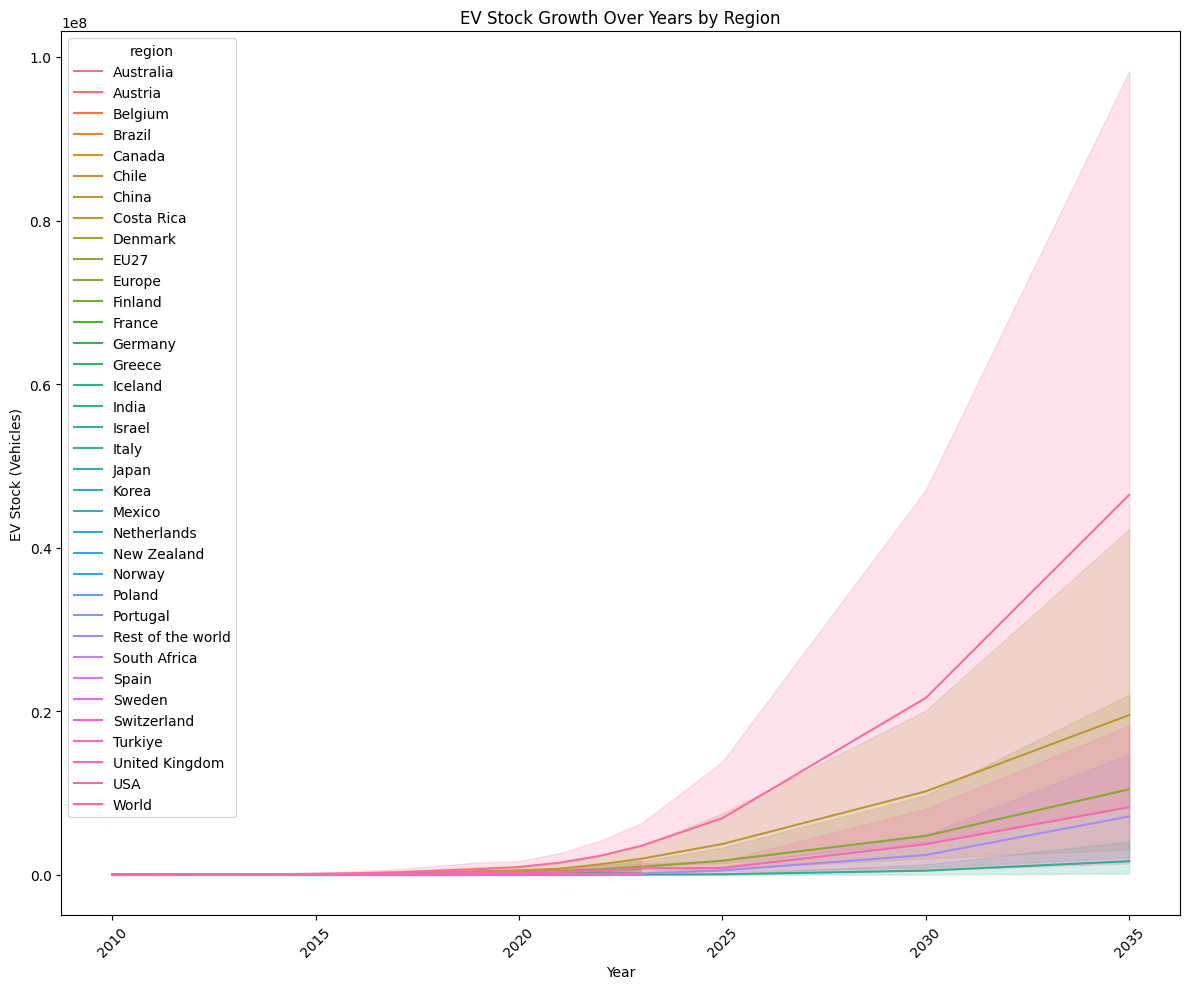

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object


In [5]:
# Visualizations and Data Type Checks – Global Dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean column names
df_global.columns = df_global.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 2: Filter relevant data
df_ev_stock = df_global[(df_global['parameter'] == 'EV stock') & (df_global['unit'] == 'Vehicles')]

# Step 3: Plot
plt.figure(figsize=(12,10))
sns.lineplot(data=df_ev_stock, x='year', y='value', hue='region')
plt.title('EV Stock Growth Over Years by Region')
plt.xlabel('Year')
plt.ylabel('EV Stock (Vehicles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Data type check
print(df_global.dtypes)

# Ensure 'year' is integer (Optional)
df_global['year'] = df_global['year'].astype(int)

# **Sub-Step 2.3: Data Cleaning – U.S. EV Dataset**

The U.S. EV dataset includes detailed vehicle-level registration data with various attributes such as vehicle type, range, make, and geographic location. To prepare this data for analysis, initial cleaning is performed to address inconsistencies, remove duplicates, and filter out non-relevant columns. Special attention is paid to fields such as Electric Range, Model Year, and location identifiers, as these are essential for further exploration.

In [6]:
# Display the first few rows to understand the structure
df_usa.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [7]:
# Display the column names to identify redundant or irrelevant columns
df_usa.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
# Drop columns that are not useful for analysis
columns_to_drop = ['VIN (1-10)', 'Postal Code', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract']
df_usa_clean = df_usa.drop(columns=columns_to_drop)

In [9]:
# Check for duplicates and remove them
df_usa_clean = df_usa_clean.drop_duplicates()

# Check for missing values
missing_values = df_usa_clean.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 County                                                 4
City                                                   4
State                                                  0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        24
Base MSRP                                             24
Legislative District                                 467
Electric Utility                                       4
dtype: int64


In [10]:
# Convert 'Model Year' to numeric (some rows might contain unexpected strings)
df_usa_clean['Model Year'] = pd.to_numeric(df_usa_clean['Model Year'], errors='coerce')

# Filter out rows where 'Model Year' or 'Electric Range' is missing or zero
df_usa_clean = df_usa_clean[(df_usa_clean['Model Year'].notna()) & (df_usa_clean['Electric Range'] > 0)]

# **Sub-Step 2.4: Visualization and Summary – U.S. EV Dataset**

Initial visualizations are used to summarize key aspects of the U.S. EV dataset. These include the distribution of EV types across states, the trend in model years, and the electric range of vehicles. This helps identify outliers, verify data consistency, and understand broad characteristics before in-depth analysis.

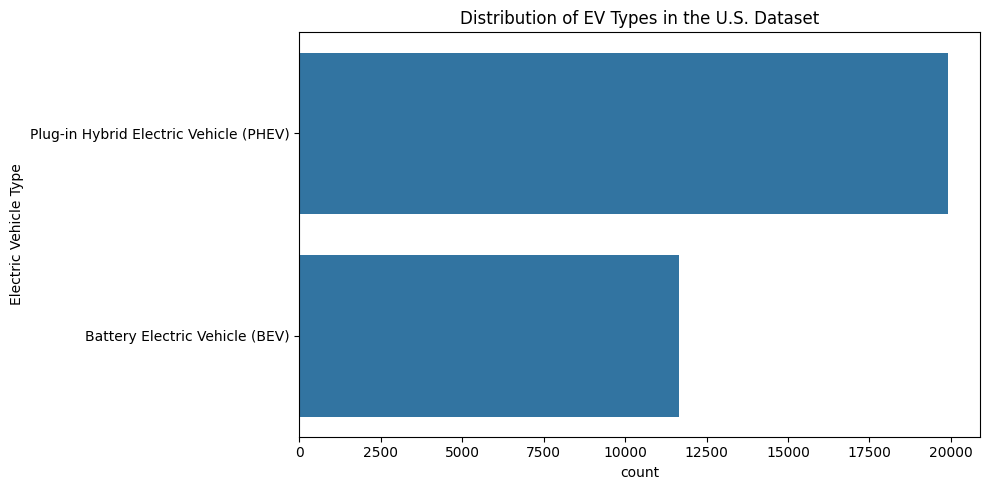

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of electric vehicle types
plt.figure(figsize=(10,5))
sns.countplot(data=df_usa_clean, y='Electric Vehicle Type', order=df_usa_clean['Electric Vehicle Type'].value_counts().index)
plt.title('Distribution of EV Types in the U.S. Dataset')
plt.tight_layout()
plt.show()

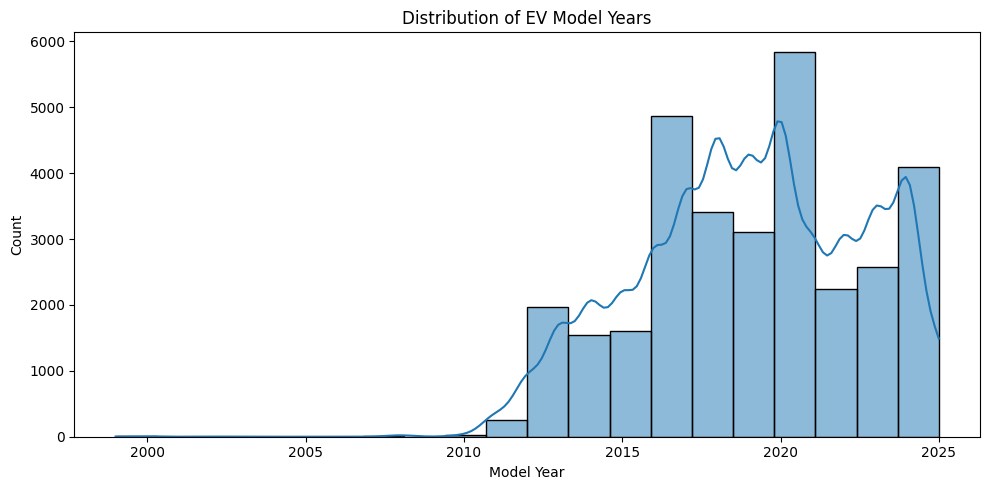

In [12]:
# Distribution of model years
plt.figure(figsize=(10,5))
sns.histplot(data=df_usa_clean, x='Model Year', bins=20, kde=True)
plt.title('Distribution of EV Model Years')
plt.tight_layout()
plt.show()

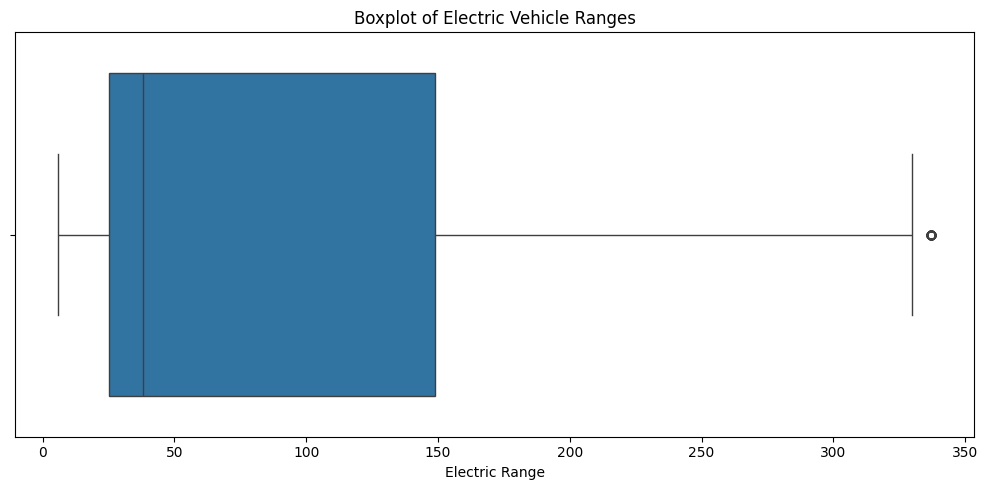

In [13]:
# Electric range distribution
plt.figure(figsize=(10,5))
sns.boxplot(data=df_usa_clean, x='Electric Range')
plt.title('Boxplot of Electric Vehicle Ranges')
plt.tight_layout()
plt.show()

# **Step 3: Exploratory Data Analysis – Introduction**

This section presents a detailed exploratory data analysis of both the global and U.S. electric vehicle (EV) datasets. The objective is to identify key trends, patterns, and regional disparities in EV adoption and technology types. Special attention is given to understanding the alignment between global and U.S. trends, examining leading versus lagging regions in EV uptake within the U.S., and highlighting technological preferences across regions. A series of visual and statistical techniques are applied to reveal these insights and build a narrative around the observed adoption behavior.

# **Sub-Step 3.1: Trend Comparison – Global vs. U.S. EV Adoption Over Time**

In this first part of EDA, we will attempt to address:



*   **Research Question 1:** To what extent do U.S. EV adoption trends align with global patterns?

We'll extract total EV stock over time for both global and U.S. datasets and visualize them in the same plot.


<Figure size 1400x600 with 0 Axes>

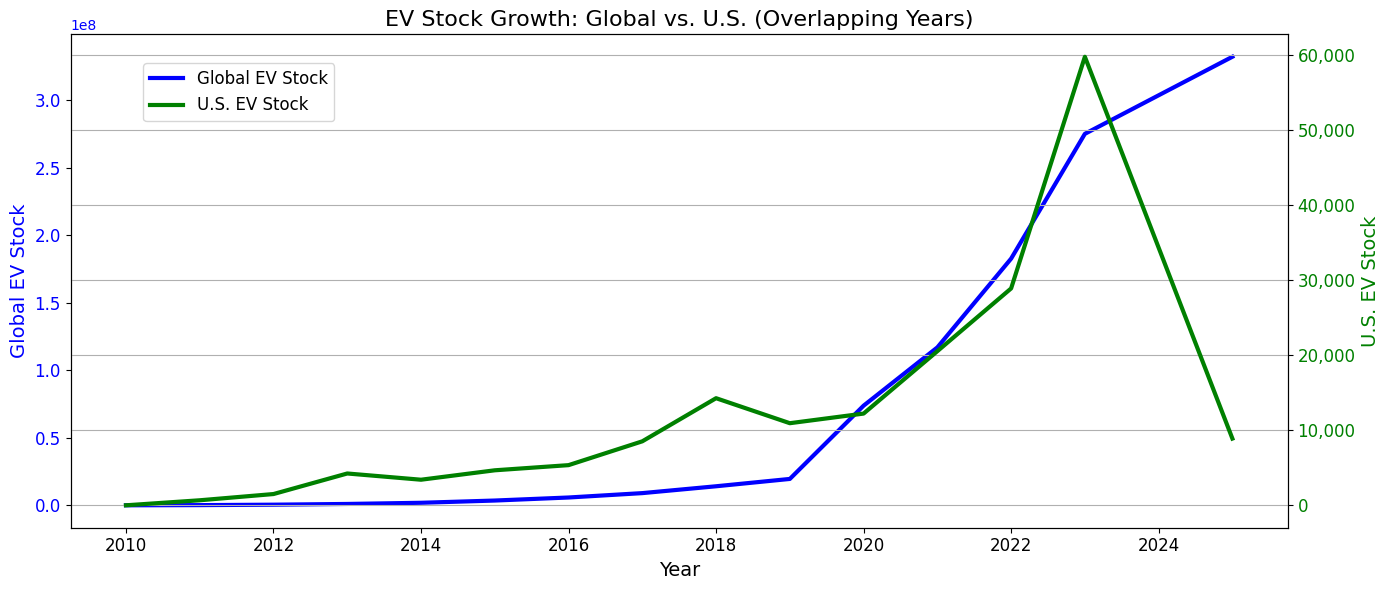

In [16]:
# Compare EV Stock Growth – Global vs. U.S.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Focus on "EV stock" for both datasets
# From Global dataset
global_ev_stock = df_global[df_global['parameter'] == 'EV stock']
global_ev_stock_grouped = global_ev_stock.groupby('year')['value'].sum().reset_index()
global_ev_stock_grouped.rename(columns={'value': 'Global_EV_Stock'}, inplace=True)

# From U.S. dataset: count EV registrations by year
us_ev_stock_grouped = df_usa.groupby('Model Year').size().reset_index(name='US_EV_Stock')

# Merge datasets for comparison
comparison_df = pd.merge(global_ev_stock_grouped, us_ev_stock_grouped, left_on='year', right_on='Model Year', how='inner')

# Plotting
plt.figure(figsize=(14, 6))

# Create axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Global EV Stock
sns.lineplot(data=comparison_df, x='year', y='Global_EV_Stock', ax=ax1, label='Global EV Stock', color='blue', linewidth=3, legend=False)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Global EV Stock', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Twin axis for US EV Stock
ax2 = ax1.twinx()
sns.lineplot(data=comparison_df, x='year', y='US_EV_Stock', ax=ax2, label='U.S. EV Stock', color='green', linewidth=3, legend=False)
ax2.set_ylabel('U.S. EV Stock', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green', labelsize=12)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Title and legend
plt.title('EV Stock Growth: Global vs. U.S. (Overlapping Years)', fontsize=16)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc="upper left", bbox_to_anchor=(0.1, 0.9), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Sub-Step 3.2: Regional Distribution of U.S. EV Uptake**

In this second part of EDA, we will attempt to address:

*   **Research Question 2:** Which regions in the U.S. are leading or lagging in EV uptake?

Identify which U.S. states have the highest or lowest EV adoption.

# **3.2.1: Aggregate EV Count by State**

In [17]:
# Step 1: Group & Count EVs by State
# Count number of EVs per state
ev_count_by_state = df_usa['State'].value_counts().reset_index()
ev_count_by_state.columns = ['State', 'EV_Count']

# Show top 10 and bottom 10 states
display(ev_count_by_state.head(10))  # Leading states
display(ev_count_by_state.tail(10))  # Lagging states

,State,EV_Count
0,WA,231749
1,CA,116
2,VA,62
3,MD,36
4,TX,30
5,CO,18
6,NC,18
7,FL,16
8,GA,14
9,NY,12


,State,EV_Count
39,AK,1
40,AE,1
41,IN,1
42,DE,1
43,MN,1
44,BC,1
45,AP,1
46,LA,1
47,NS,1
48,MS,1


<ipython-input-18-b6b204289f23>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='EV_Count', y='State', palette='viridis')


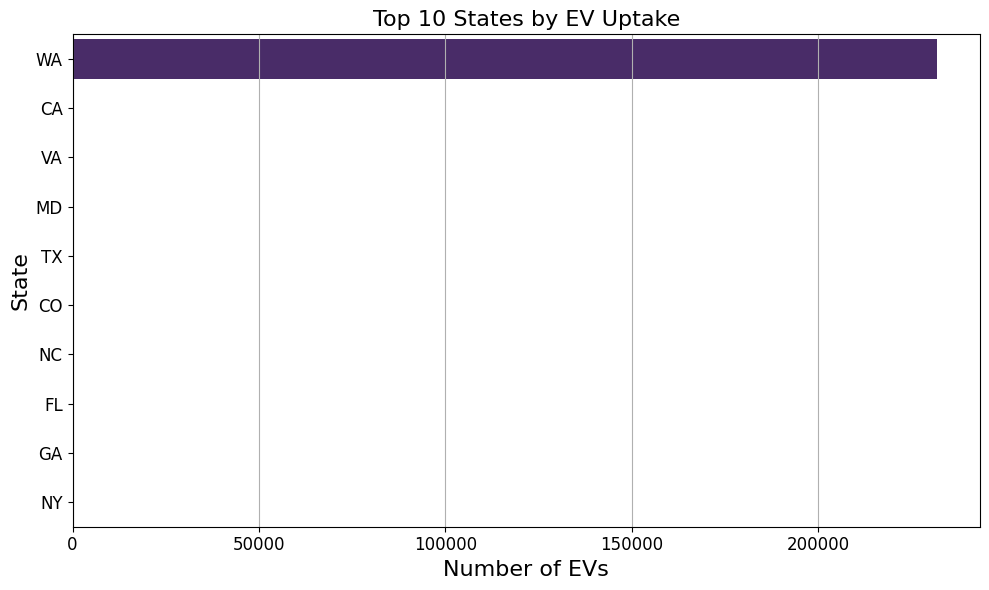

In [18]:
# Step 2: Plot Top 10 EV-Adopting States
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 EV adopting states
top_states = ev_count_by_state.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_states, x='EV_Count', y='State', palette='viridis')
plt.title('Top 10 States by EV Uptake', fontsize=16)
plt.xlabel('Number of EVs', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

<ipython-input-19-8d69f30752e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_states, x='EV_Count', y='State', palette='magma')


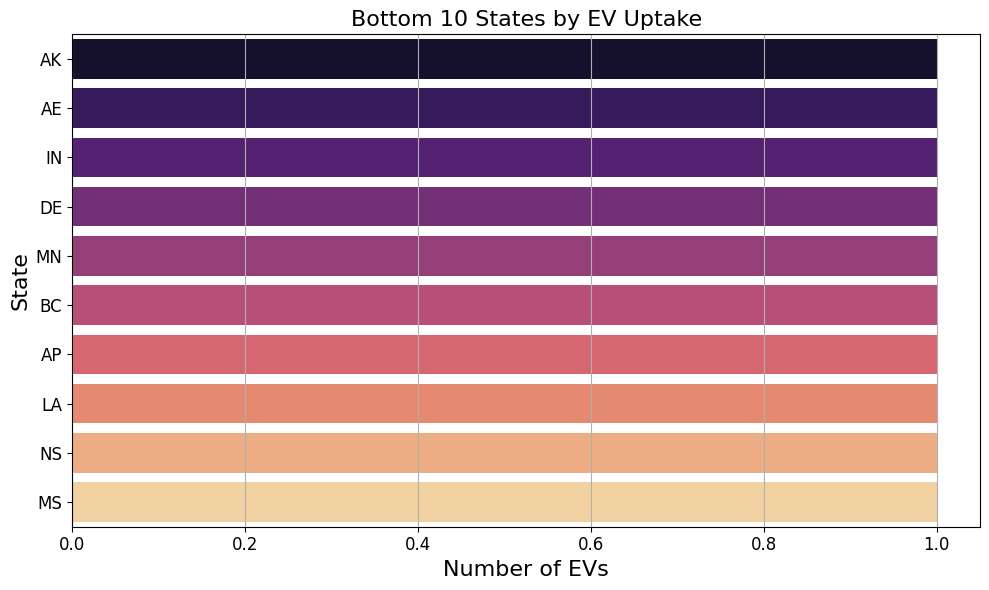

In [19]:
# Step 3: Plot Bottom 10 EV-Adopting States
# Plot bottom 10 EV adopting states
bottom_states = ev_count_by_state.tail(10).sort_values('EV_Count')  # Re-sort for clarity

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_states, x='EV_Count', y='State', palette='magma')
plt.title('Bottom 10 States by EV Uptake', fontsize=16)
plt.xlabel('Number of EVs', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# **3.2.2: Choropleth Map of EV Adoption in U.S. States**

In [20]:
# Define valid U.S. state abbreviations
valid_states = set([
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS',
    'KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY',
    'NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV',
    'WI','WY','DC'
])

# Filter your EV count data
ev_by_state = df_usa.groupby('State').size().reset_index(name='EV_Count')
ev_by_state = ev_by_state[ev_by_state['State'].isin(valid_states)]

In [21]:
import plotly.express as px

# Step 1: Aggregate EV counts by State (2-letter abbreviations)
ev_by_state = df_usa.groupby('State').size().reset_index(name='EV_Count')

# Step 2: Plot Choropleth
fig = px.choropleth(ev_by_state,
                    locations='State',       # State abbreviations
                    locationmode="USA-states",
                    color='EV_Count',
                    color_continuous_scale="Viridis",
                    scope="usa",
                    labels={'EV_Count': 'EV Registrations'},
                    title='Choropleth Map of EV Adoption by U.S. State')

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

# **Sub-Step 3.3: Differences in EV Types and Technologies Across U.S. Regions**

In this third part of EDA, we will attempt to address:

*   **Research Question 3:** What are the key differences in EV types and technologies across regions?

To tackle this, we will strategically focus on only the most insightful plots that reveal variation in EV technologies (e.g., BEVs vs. PHEVs, luxury vs. mass-market models, range etc.) across U.S. states or regions.

# **3.3.1: Distribution of EV Types (BEV vs PHEV) by Top 10 States**

**Objective:** Identify how the preference for EV drivetrain types varies across states.

<Figure size 1200x600 with 0 Axes>

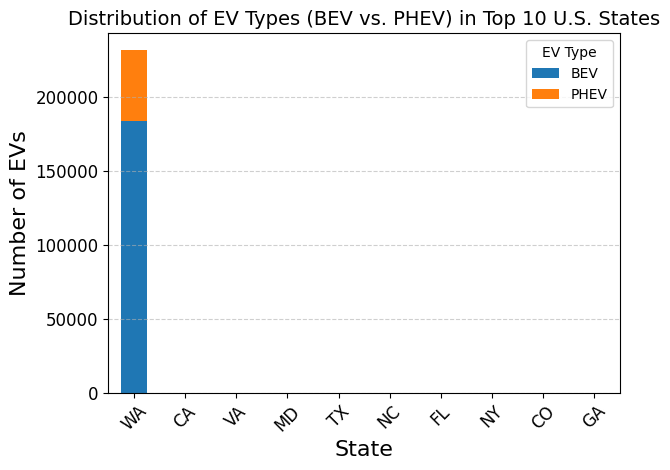

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names for easier access
df_usa.columns = df_usa.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Filter for only BEVs and PHEVs
df_usa = df_usa[df_usa['Electric_Vehicle_Type'].isin([
    'Battery Electric Vehicle (BEV)',
    'Plug-in Hybrid Electric Vehicle (PHEV)'
])]

# Map to short type names
df_usa['Technology'] = df_usa['Electric_Vehicle_Type'].map({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

# Count EVs by State and Technology
ev_counts = df_usa.groupby(['State', 'Technology']).size().reset_index(name='EV_Count')

# Get Top 10 States by total EV count
top_states = df_usa['State'].value_counts().nlargest(10).index
ev_top_states = ev_counts[ev_counts['State'].isin(top_states)]

# Pivot for stacked bar plot
ev_pivot = ev_top_states.pivot(index='State', columns='Technology', values='EV_Count').fillna(0)
ev_pivot = ev_pivot.sort_values(by='BEV', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ev_pivot.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

plt.title('Distribution of EV Types (BEV vs. PHEV) in Top 10 U.S. States', fontsize=14)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number of EVs', fontsize=16)
plt.xticks(rotation=45)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='EV Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **3.3.2: Most Popular EV Models by Region?**

**Objective:** Here we explore regional preferences by identifying the most popular EV models in different U.S. states.

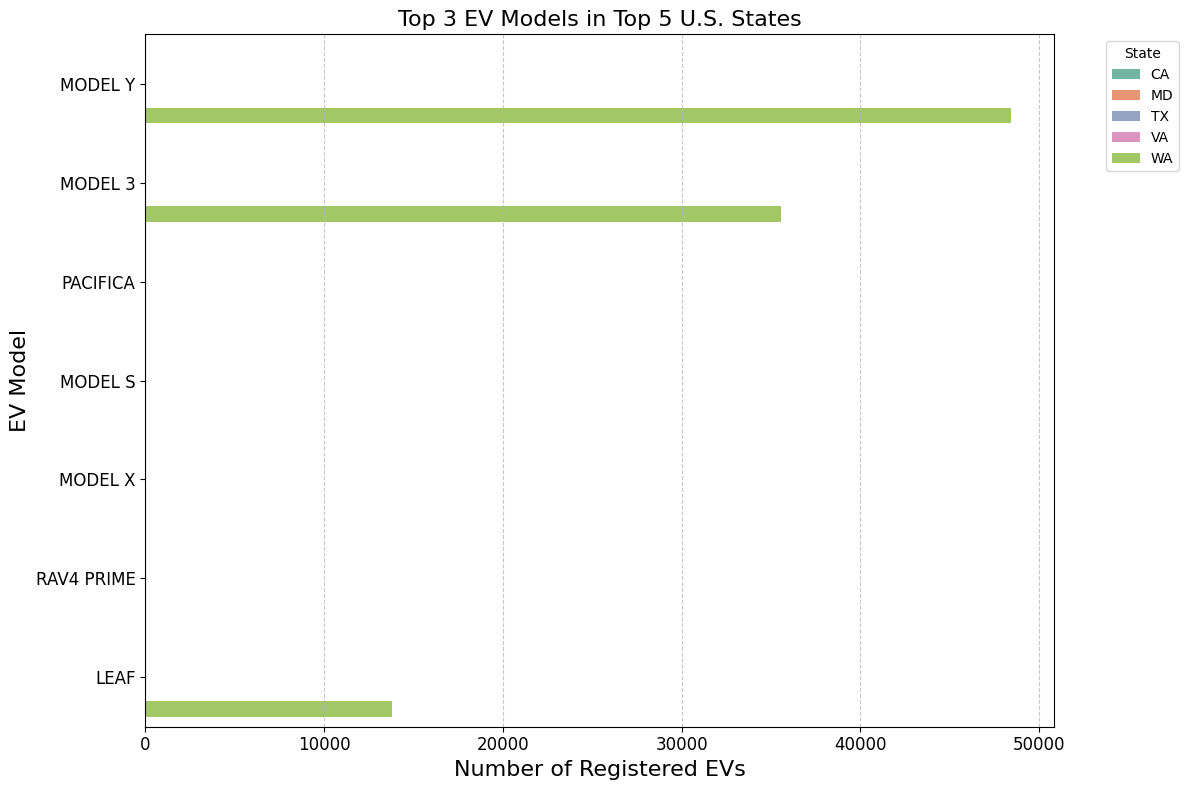

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean columns
df_usa.columns = df_usa.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Step 2: Filter for BEV and PHEV types only
df_usa = df_usa[df_usa['Electric_Vehicle_Type'].isin([
    'Battery Electric Vehicle (BEV)',
    'Plug-in Hybrid Electric Vehicle (PHEV)'
])]

# Step 3: Get top 5 states by EV registrations
top_5_states = df_usa['State'].value_counts().nlargest(5).index.tolist()

# Step 4: Filter only for those states
df_top_states = df_usa[df_usa['State'].isin(top_5_states)]

# Step 5: Group by State & Model, get counts
top_models_by_state = (
    df_top_states.groupby(['State', 'Model'])
    .size()
    .reset_index(name='Count')
)

# Step 6: For each state, get top 3 models (to avoid overcrowding)
top_models_filtered = (
    top_models_by_state
    .sort_values(['State', 'Count'], ascending=[True, False])
    .groupby('State')
    .head(3)
)

# Step 7: Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_models_filtered,
    x='Count',
    y='Model',
    hue='State',
    palette='Set2'
)

plt.title('Top 3 EV Models in Top 5 U.S. States', fontsize=16)
plt.xlabel('Number of Registered EVs', fontsize=16)
plt.ylabel('EV Model', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **3.3.3: BEV vs. PHEV Share by State (in %)**

**Objective:** To compare the proportional share of Battery Electric Vehicles (BEV) vs Plug-in Hybrid Electric Vehicles (PHEV) across different U.S. states.

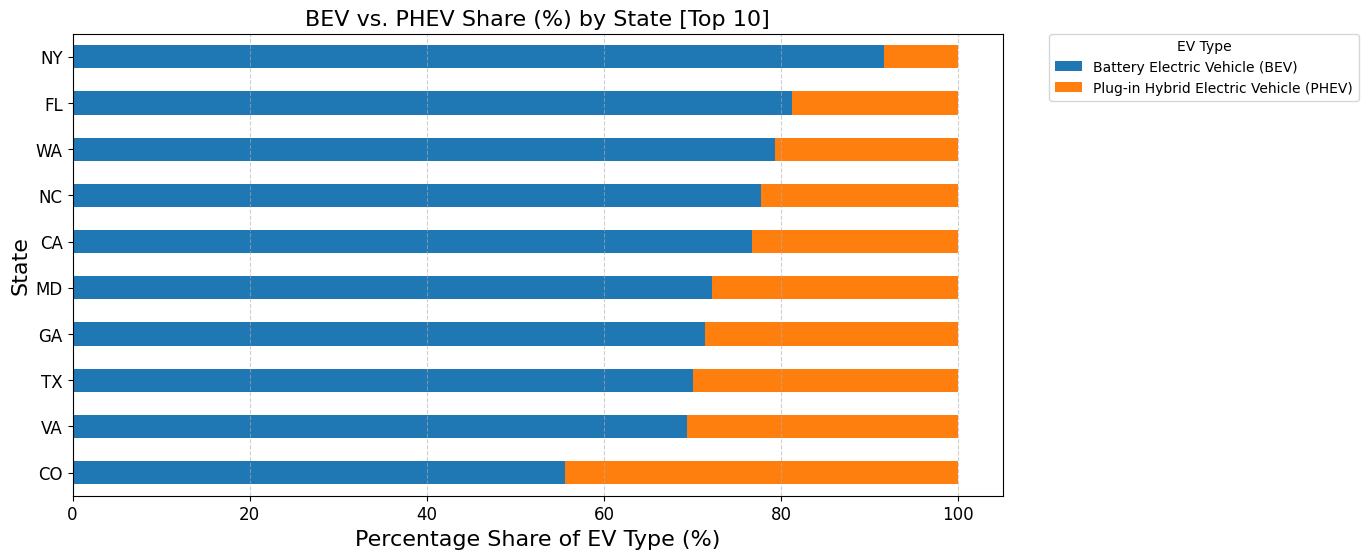

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean column names
df_usa.columns = df_usa.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Step 2: Filter for BEVs and PHEVs only
df_ev = df_usa[df_usa['Electric_Vehicle_Type'].isin([
    'Battery Electric Vehicle (BEV)',
    'Plug-in Hybrid Electric Vehicle (PHEV)'
])]

# Step 3: Get Top 10 states by EV registration count
top_10_states = df_ev['State'].value_counts().nlargest(10).index.tolist()

# Step 4: Filter only Top 10 States
df_top_states = df_ev[df_ev['State'].isin(top_10_states)]

# Step 5: Group by State and EV Type → count vehicles
state_type_counts = (
    df_top_states.groupby(['State', 'Electric_Vehicle_Type'])
    .size()
    .unstack(fill_value=0)
)

# Step 6: Convert to Percentage (row-wise)
state_type_percentage = state_type_counts.div(state_type_counts.sum(axis=1), axis=0) * 100

# Step 7: Plot stacked horizontal bar chart
state_type_percentage.sort_values(by='Battery Electric Vehicle (BEV)', ascending=True).plot(
    kind='barh',
    stacked=True,
    figsize=(12, 6),
    color=['#1f77b4', '#ff7f0e']
)

plt.title('BEV vs. PHEV Share (%) by State [Top 10]', fontsize=16)
plt.xlabel('Percentage Share of EV Type (%)', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='EV Type', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# **Step 4: Ethics and Limitations**

This project uses public datasets to explore EV trends in the U.S. and globally. The data is anonymous and does not include any personal details.

Still, there are a few important limitations:
*   **Limited Coverage:** Some states and regions may be missing or underrepresented in the data.
*   **Possible Bias:** States that share EV data more openly (like California or Washington) might influence the results.
*   **Outdated Info:** The datasets may not reflect the latest EV developments or policy changes.
*   **Global Differences:** EV definitions and reporting methods can vary between countries.

I have tried to present fair and balanced insights. In future work, adding more diverse data and considering social or environmental impacts could improve the analysis.

# **Step 5: Conclusions and Documentation**

Key insights from this project are effectively presented through the plots in **Step 3: Exploratory Data Analysis**. These visualizations reveal clear regional patterns in EV adoption, preferences between BEVs and PHEVs, and model popularity by state. More detailed conclusions will be shared during the final presentation.

The notebook includes clear documentation, with each step logically structured and supported by comments. While based on course concepts, the use of real-world data and regional comparisons adds originality. Future work could explore trends over time or link adoption patterns to charging infrastructure and policy factors.

# **Step 6: Presentation**

The presentation slides are submitted with the project through Google Classroom. They offer a clear summary of the work and will be explained in detail during the actual presentation. The goal is to communicate the findings effectively, show a good grasp of the topic, and confidently answer any questions.